In [30]:
%pylab inline
import numpy as np
import pylab as pl
#import kmseg
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import json
import os
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)
import pandas as pd
import csv
import pylab as pl
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
import geopandas as gpd
import scipy.cluster as scp
from scipy.cluster.vq import whiten
from geopy.distance import great_circle

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [31]:
df = pd.read_csv('20151014_Cleaning_DownloadSites.csv', sep=';')


In [32]:
myarray = df.as_matrix(columns = df.columns[13:15])
# print myarray
# array2 = np.transpose(myarray)
# # print array2
# fig = pl.figure(figsize=(10,10))
# pl.scatter(array2[0], array2[1], alpha=0.5)

In [33]:
import pyproj as pp
lon, lat  = [], []
df['lon'] = np.zeros(len(df['Service Request#']))
df['lat'] = np.zeros(len(df['Service Request#']))

for i in myarray:
    proj = pp.Proj(init='epsg:2263', preserve_units=True)
    x, y = i[0], i[1]
    lon1,lat1 = proj(x, y, inverse=True)
    lon.append(lon1)
    lat.append(lat1)
#   df['lon'], df['lat']

# mplleaflet.display(crs=df.crs)
#hstack 

df['lat'] = np.array(lat)
df['lon'] = np.array(lon)

coordinates = df.as_matrix(columns=['lon', 'lat'])
D = len(coordinates[0])
N = len(coordinates)
print "number of features: ", D
print "number of data points: ", N
# print coordinates

number of features:  2
number of data points:  336


#Kmeans Clustering

In [34]:
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://en.wikipedia.org/wiki/K-means_clustering
# test = KMeans(n_clusters = 23).fit(myarray)

In [35]:
# centers = test.cluster_centers_
# # print centers

In [36]:
# fig = pl.figure(figsize=(10,10))
# pl.scatter(array2[0],array2[1], alpha=0.5)
# pl.scatter(np.transpose(centers)[0],np.transpose(centers)[1], color = 'r', alpha=0.5)

In [37]:
# w = whiten(coordinates)
# print coordinates.mean(axis=0), w.mean(axis=0)
# print coordinates.std(axis=0), w.std(axis=0)
w = coordinates

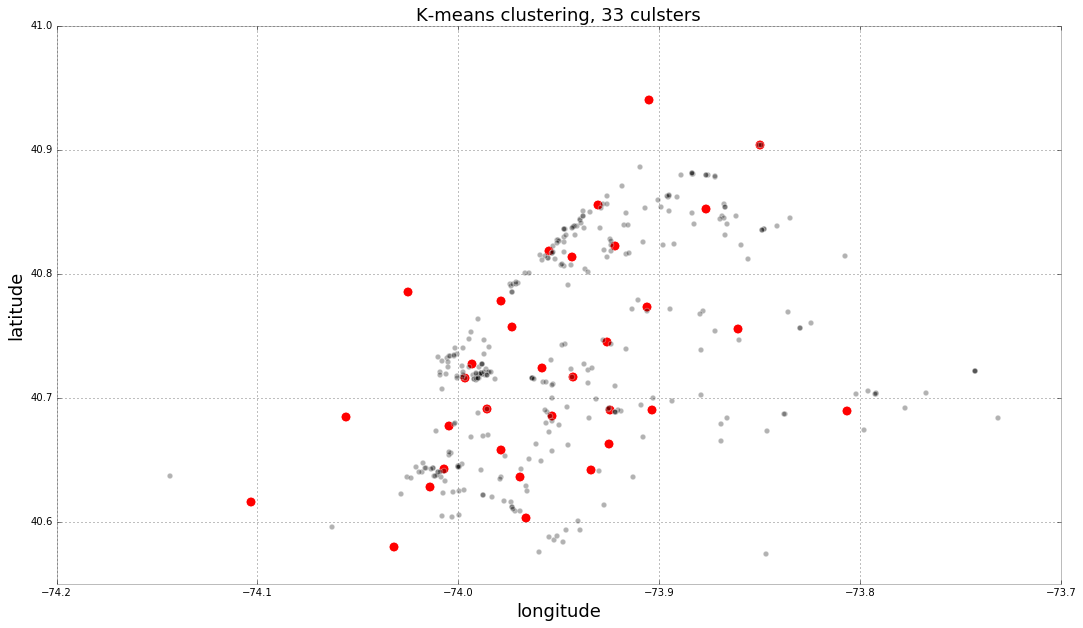

In [38]:
# k means cluster results depend on the starting point, which is random!
num_clusters = len(df['Service Request#'])/10
for i in range(1):
    cluster_centroids, closest_centroids = kmeans2(w, num_clusters, iter=1)
    pl.figure(figsize=(18, 10))
    pl.scatter(cluster_centroids[:,0], cluster_centroids[:,1], c='r', s=100)
    pl.scatter(w[:,0], w[:,1], c='k', alpha=.3, s=30)
    pl.xlabel("longitude", fontsize=18)
    pl.ylabel("latitude", fontsize=18)
    pl.title("K-means clustering, %d culsters"%num_clusters, fontsize=18)

In [39]:
#a function to get N different colors from a colormap given an array size N
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

#get the cluster centers
cluster_centroids, closest_centroids = kmeans2(w, num_clusters, iter=1, minit='points')
colors = get_colors(closest_centroids, pl.cm.jet)
colorsc = get_colors(np.arange(num_clusters), pl.cm.jet)

[3, 8, 10, 3, 18, 13, 10, 13, 4, 6, 10, 8, 8, 8, 15, 20, 5, 30, 15, 34, 3, 9, 6, 5, 8, 7, 3, 10, 4, 10, 5, 13, 12]


(-74.1, -73.7)

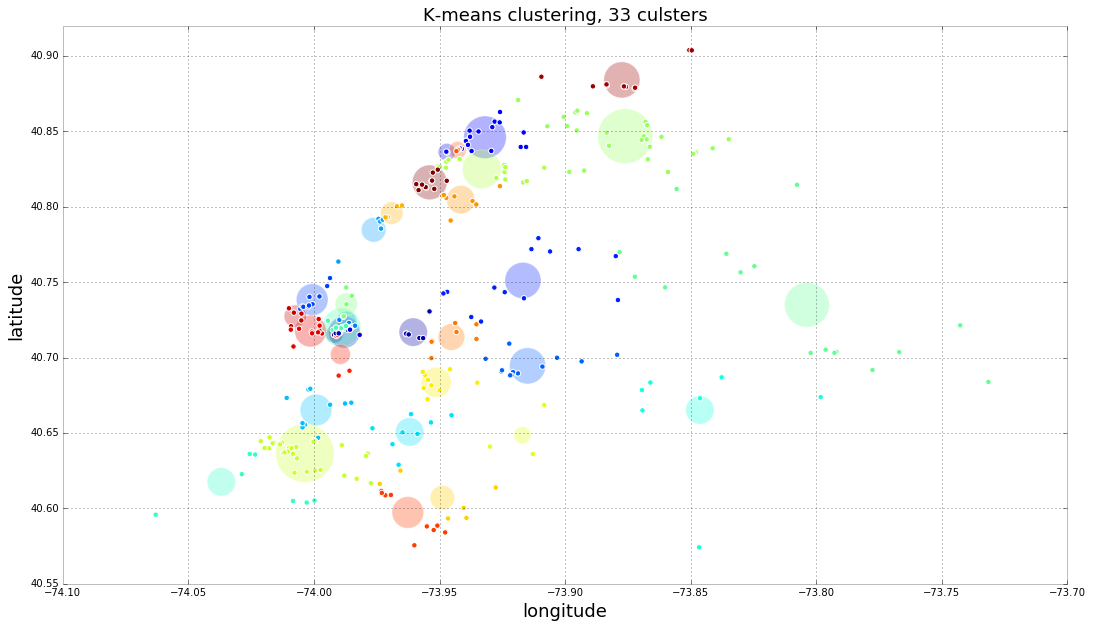

In [40]:
plt.figure(figsize=(18, 10), dpi=100)
print [sum(closest_centroids == i) for i in range(num_clusters)]
plt.scatter(cluster_centroids[:,0], cluster_centroids[:,1], c=colorsc, alpha=.3, 
            s=np.array([sum(closest_centroids == i) for i in range(num_clusters)])*100)

pl.scatter(w[:,0], w[:,1], c=colors, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("K-means clustering, %d culsters"%num_clusters, fontsize=18)
pl.ylim([40.55,40.92])
pl.xlim([-74.1,-73.7])


In [43]:
plt.figure(figsize=(18, 10), dpi=100)
print [sum(closest_centroids == i) for i in range(num_clusters)]
plt.scatter(cluster_centroids[:,0], cluster_centroids[:,1], c=colorsc, alpha=.3, 
            s=np.array([sum(closest_centroids == i) for i in range(num_clusters)])*100)

pl.scatter(w[:,0], w[:,1], c=colors, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("K-means clustering, %d culsters"%num_clusters, fontsize=18)

# mplleaflet.show(tiles=('https://api.mapbox.com/v4/mapbox.light/{z}/{x}/{y}.png?access_token=pk.eyJ1IjoiemhvdWpoNDIiLCJhIjoiY2VkNGU4OGE1YjEwODMxODUyMmUzNjYwZjQyOWNkODMifQ.55ZHYWs5RP3CfpIyrmOisQ',''))
mplleaflet.display(tiles=('https://api.mapbox.com/v4/mapbox.light/{z}/{x}/{y}.png?access_token=pk.eyJ1IjoiemhvdWpoNDIiLCJhIjoiY2VkNGU4OGE1YjEwODMxODUyMmUzNjYwZjQyOWNkODMifQ.55ZHYWs5RP3CfpIyrmOisQ',''))




[3, 8, 10, 3, 18, 13, 10, 13, 4, 6, 10, 8, 8, 8, 15, 20, 5, 30, 15, 34, 3, 9, 6, 5, 8, 7, 3, 10, 4, 10, 5, 13, 12]


###This is the Agglomerative Cluster method in scikit that we used to generate the final clusters.

In [12]:
#function to get the centroid from DBscan as mean of cluster members
def getCentroid(points):
    #print points[:,0], np.nanmean(points[:,0])
    return np.nanmean(points[:,0]), np.nanmean(points[:,1])

In [13]:
#a function to get N different colors from a colormap given an array size N
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

In [14]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
# # https://en.wikipedia.org/wiki/Hierarchical_clustering

# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt

# num_clusters = len(df['Service Request#'])/10
# # print num_clusters
# agc = AgglomerativeClustering(n_clusters = num_clusters, linkage='average', affinity='manhattan').fit(myarray)
# # print agg_cluster

# labelsag = agc.labels_
# centroidsag = np.zeros((num_clusters,2))

# colorsc3 = get_colors(np.arange(num_clusters), pl.cm.jet)
# colors3 = get_colors(labelsag, pl.cm.jet)
# for i in labelsag:
#     centroidsag[i] = getCentroid(myarray[labelsag == i])

# # dfc = pd.DataFrame()
# # dfc['xcoord'] = centroidsag[:,0]
# # dfc['ycoord'] = centroidsag[:,1]
# # dfc['size'] = np.array([sum(labelsag == i) for i in range(num_clusters)])*100

# # print dfc
# # dfc.to_csv('Graffiti_121015.csv', encoding='utf-8', index=False)

In [15]:
# pl.figure(figsize=(18, 18), dpi=100)
# #print [sum(labelsag == i) for i in range(num_clusters)]
# pl.scatter(centroidsag[:,0], centroidsag[:,1], c=colorsc3, alpha=.6, 
#             s=np.array([sum(labelsag == i) for i in range(num_clusters)])*100)
 
# pl.scatter(myarray[:,0], myarray[:,1], c=colors3, s=30)
# pl.xlabel("X Coordinates", fontsize=18)
# pl.ylabel("Y Coordinates", fontsize=18)
# pl.title("Agglomerative clustering, averge, 33 culsters", fontsize=18)

# # m = Basemap(projection='merc',llcrnrlat=40.55,urcrnrlat=40.82,\
# #             llcrnrlon=-74.1, urcrnrlon=-73.82, lat_ts=40.5)
# # m.drawmapboundary(fill_color='#85A6D9')
# # m.drawcoastlines(color='#6D5F47', linewidth=.4)
# # m.drawrivers(color='#6D5F47', linewidth=.4)
# # m.fillcontinents(color='white',lake_color='#85A6D9')
# # plt.show()

33


(-74.1, -73.7)

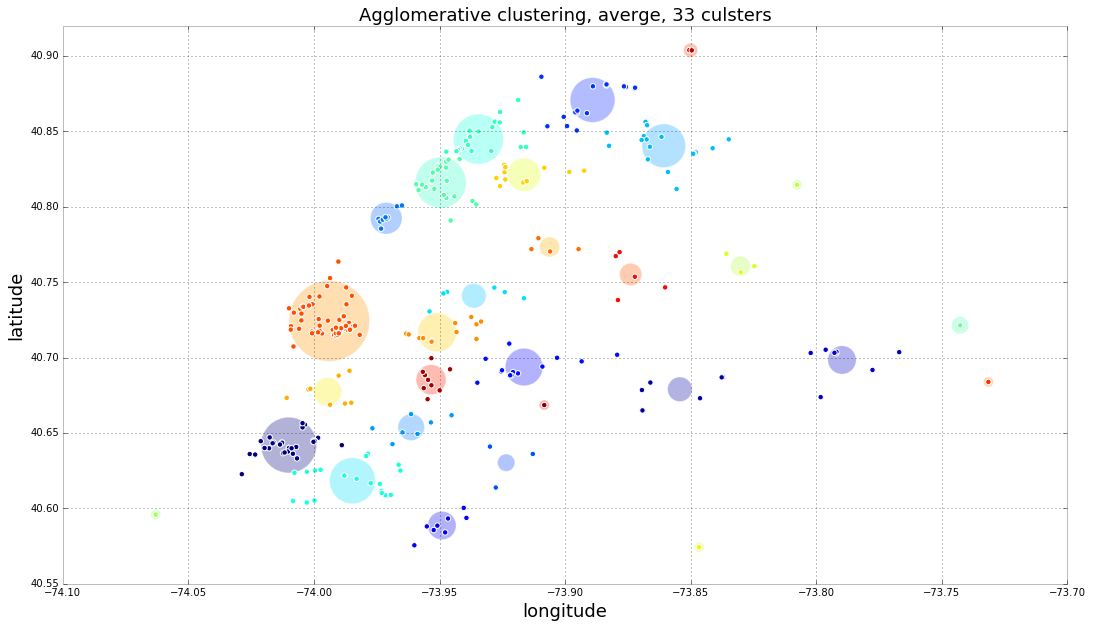

In [22]:

import matplotlib.pyplot as plt

agc = AgglomerativeClustering(n_clusters=30,  
                              linkage='average', 
                              affinity='manhattan').fit(coordinates)
num_clusters = len(df['Service Request#'])/10
labelsag = agc.labels_
centroidsag = np.zeros((num_clusters,2))
print num_clusters

colorsc3 = get_colors(np.arange(num_clusters), pl.cm.jet)
colors3 = get_colors(labelsag, pl.cm.jet)
for i in labelsag:
    centroidsag[i] = getCentroid(coordinates[labelsag == i])

pl.figure(figsize=(18, 10), dpi=100)
#print [sum(labelsag == i) for i in range(30)]
pl.scatter(centroidsag[:,0], centroidsag[:,1], c=colorsc3, alpha=.3, 
            s=np.array([sum(labelsag == i) for i in range(num_clusters)])*100)
 
pl.scatter(coordinates[:,0], coordinates[:,1], c=colors3, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Agglomerative clustering, averge, %s culsters" %(str(num_clusters)), fontsize=18) 
pl.ylim([40.55,40.92])
pl.xlim([-74.1,-73.7])

# a=agc.n_components_ 
# print a


In [17]:
import mplleaflet
import matplotlib.pyplot as plt

agc = AgglomerativeClustering(n_clusters=30,  
                              linkage='average', 
                              affinity='manhattan').fit(coordinates)
num_clusters = len(df['Service Request#'])/10
labelsag = agc.labels_
centroidsag = np.zeros((num_clusters,2))
print num_clusters

colorsc3 = get_colors(np.arange(num_clusters), pl.cm.jet)
colors3 = get_colors(labelsag, pl.cm.jet)
for i in labelsag:
    centroidsag[i] = getCentroid(coordinates[labelsag == i])

pl.figure(figsize=(18, 18), dpi=100)
#print [sum(labelsag == i) for i in range(30)]
pl.scatter(centroidsag[:,0], centroidsag[:,1], c=colorsc3, alpha=.3, 
            s=np.array([sum(labelsag == i) for i in range(num_clusters)])*100)
 
pl.scatter(coordinates[:,0], coordinates[:,1], c=colors3, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Agglomerative clustering, averge, %s culsters" %(str(num_clusters)), fontsize=18)
pl.ylim([40.55,40.92])
pl.xlim([-74.1,-73.7])

# mplleaflet.show(tiles=('https://api.mapbox.com/v4/mapbox.light/{z}/{x}/{y}.png?access_token=pk.eyJ1IjoiemhvdWpoNDIiLCJhIjoiY2VkNGU4OGE1YjEwODMxODUyMmUzNjYwZjQyOWNkODMifQ.55ZHYWs5RP3CfpIyrmOisQ',''))

# mplleaflet.display(tiles=('https://api.mapbox.com/v4/mapbox.light/{z}/{x}/{y}.png?access_token=pk.eyJ1IjoiemhvdWpoNDIiLCJhIjoiY2VkNGU4OGE1YjEwODMxODUyMmUzNjYwZjQyOWNkODMifQ.55ZHYWs5RP3CfpIyrmOisQ',''))

mplleaflet.display(tiles=('https://api.mapbox.com/v4/mapbox.light/{z}/{x}/{y}.png?access_token=pk.eyJ1IjoiemhvdWpoNDIiLCJhIjoiY2VkNGU4OGE1YjEwODMxODUyMmUzNjYwZjQyOWNkODMifQ.55ZHYWs5RP3CfpIyrmOisQ',''))



33


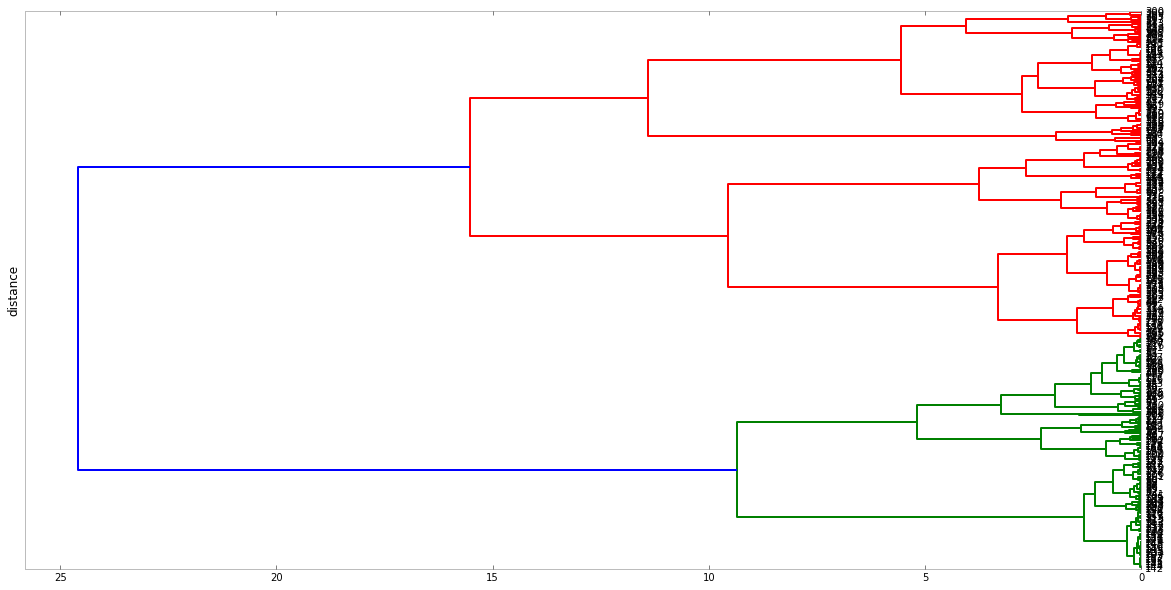

In [18]:


w = whiten(coordinates)

fig = pl.figure(figsize=(20,10))
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(w, method='ward'),
                               leaf_rotation=90,  # rotates the x axis labels
                               leaf_font_size=8,orientation='right')  # font size for the x axis labels)
#pl.xticks(rotation=90)
pl.grid('off')

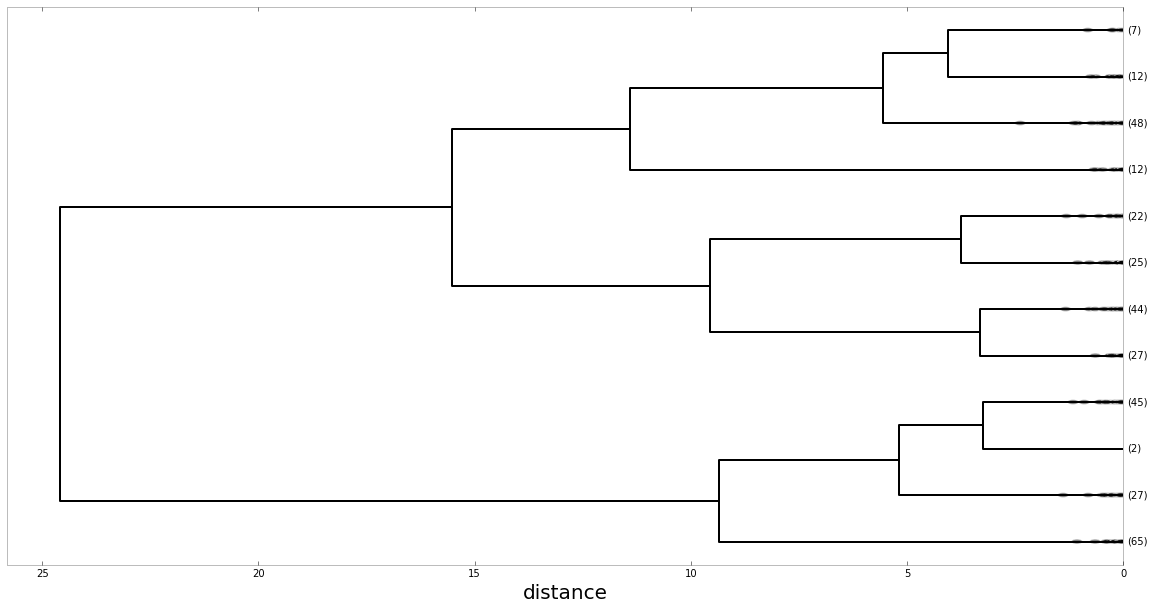

In [19]:
fig = pl.figure(figsize=(20,10))

ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(w, method='ward'),
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=20, truncate_mode='lastp', p=12, 
                               show_contracted=True, color_threshold = 2, 
                               orientation='right', above_threshold_color='k'
                              )  # font size for the x axis labels)
#pl.xticks(rotation=90)
pl.xlabel("distance", fontsize=20)
pl.grid('off')
#scp.hierarchy.dendrogram?

In [20]:
# add the name of the cluster to the dataframe for each site
df['cluster'] = agc.labels_

print df.columns
print df['Service Request#'].groupby(df['Boro']).count()

# save dataframe to csv
# df.to_csv('dsny_site_groups.csv')

Index([u'Service Request#', u'Incident Date', u'BLDG#', u'Street', u'Boro',
       u'Zip', u'Cross Streets', u'Cleaning Methods', u'San Dist', u'CB',
       u'Precinct', u'Council Dist', u'City Owned', u'xcoord', u'ycoord',
       u'On Roll Down Gate', u'Cherry Picker', u'Above 3rd Floor', u'LM',
       u'lon', u'lat', u'cluster'],
      dtype='object')
Boro
BRONX             57
BROOKLYN         117
MANHATTAN        122
QUEENS            38
STATEN ISLAND      2
dtype: int64


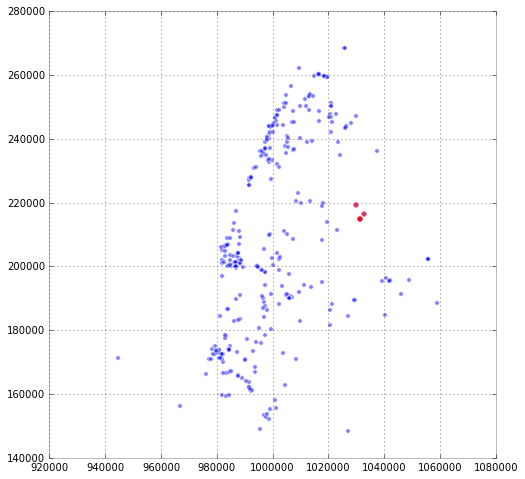

In [21]:
# set count to the cluster you want to plot (between 0 and num_clusters)
# and it will plot that cluster's sites in red (vs blue for all the rest)
count = 18
df1 = df[df['cluster'] == count]
fig = pl.figure(figsize=(8,8))
pl.scatter(df.xcoord, df.ycoord, alpha=0.5)
pl.scatter(df1.xcoord, df1.ycoord, color = 'r', alpha =0.5)